# TASK-1

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

Although the Scikit-learn library provides a dataset for iris flower classification, you can also
download the same dataset from here for the task of iris flower classification with Machine
Learning. 

In [1]:
#Load the packages that are required
import pandas as pd
import numpy as np

In [2]:
#Load the data from the csv file
iris=pd.read_csv("iris.csv")

In [3]:
#The top 5 records from the given dataset are seen
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#The information regarding columns can be acquired
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#To retrieve the names of the columns
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#The total number of rows and number of columns are seen
iris.shape

(150, 6)

In [31]:
#The categories present in the target variable with its count in it
iris['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
#Total number of missing values in the given dataset corresponding to the column
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#Total duplicates in the dataset can be obtained
iris.duplicated().sum()

0

In [10]:
#Converting the categorical data to numeric by encoding processes
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

iris['Species'] = encoder.fit_transform(iris['Species'])

In [11]:
#Dividing the whole transformed data to independent and dependent variables
x=iris.drop(["Id","Species"],axis=1)
y=iris['Species']

In [12]:
#After segregation, the records in independent variables dataframe
x.shape           #There are 150 rows and 4 columns

(150, 4)

In [13]:
#After segregation the records in dependent variable dataframe
y.shape          #There are 150 rows and 1 column

(150,)

In [14]:
#The top 5 records in independent variable data
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
#The top 5 records in dependent variable data
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [16]:
#Splitting the data into train and test data for model building and model evaluation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [17]:
#The data present in the training data of independent variables dataframe
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5


In [18]:
#The data present in the training data of dependent variable dataframe
y_train.head()

4      0
32     0
142    2
85     1
86     1
Name: Species, dtype: int32

In [19]:
#The data present in the testing data of independent variables dataframe
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [20]:
#The data present in the testing data of dependent variable dataframe
y_test.head()

73     1
18     0
118    2
78     1
76     1
Name: Species, dtype: int32

In [21]:
#Model Building
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=8)

In [22]:
#Making the model to learn by giving the training data
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [23]:
#Obtaining the predictions from the trained model
y_pred=classifier.predict(x_test)

In [24]:
#Assessing the performance of model with the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
result=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:-")
print(result)

Confusion Matrix:-
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [25]:
#The classification report
result1=classification_report(y_test,y_pred)
print("Classification Report:-")
print(result1)

Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [26]:
#Overall accuracy of a model
result2=accuracy_score(y_test,y_pred)
print("Accuracy Score:-")
print(result2)

Accuracy Score:-
1.0


In [27]:
#The values in the testing data of a dependent variable
y_test.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [28]:
#The values obtained by predictions
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [29]:
#Comparision of predicted and original values and initialising the values of some columns with false 
df2=pd.DataFrame({'Test_Values':y_test.values,'Predicted_Values':y_pred,'Correct_Values':False,"Wrong_Values":False})
df2.head()

,Test_Values,Predicted_Values,Correct_Values,Wrong_Values
0,1,1,False,False
1,0,0,False,False
2,2,2,False,False
3,1,1,False,False
4,1,1,False,False


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

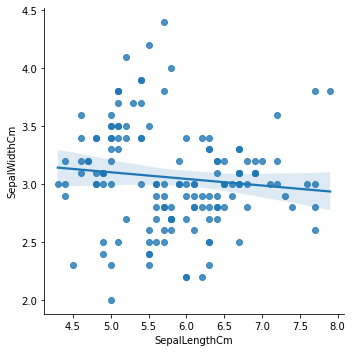

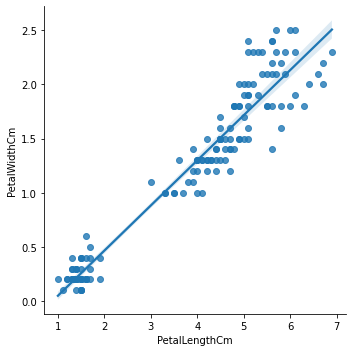

In [35]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=iris)
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=iris)